In [34]:
from random import random
import numpy as np
from typing import Callable
from numpy import array, dot, ndarray

class Layer:
    w: ndarray
    b: ndarray
    act: Callable[[ndarray], ndarray]
    neurons: int
    def __repr__(self) -> str:
        return f"Layer{{w={self.w}, b={self.b}}}"

    def feed_forward(self, input: ndarray) -> ndarray:
        raise NotImplementedError("abstract method")

class DenseLayer(Layer):
    def __init__(self, w: ndarray, b: ndarray, act: Callable[[ndarray], ndarray]):
        self.w = w
        self.b = b
        self.act = act
        self.neurons = w.shape[0]

    def feed_forward(self, input: ndarray) -> ndarray:
        return self.act(dot(self.w, input) + self.b)

class LayerModel:
    act: Callable[[ndarray], ndarray]
    neurons: int
    _type: str

    def activation(self, act: Callable[[ndarray], ndarray]):
        self.act = act

    def __init__(self, neurons: int, type: str = "dense") -> None:
        self.neurons = neurons
        self.act = lambda x: x
        self._type = "dense"

    def build(self, input_shape) -> DenseLayer:
        match self._type:
            case "dense":
                w = array([[random() for _ in range(input_shape)] for _ in range(self.neurons)])
                b = array([0. for _ in range(self.neurons)])
                return DenseLayer(w, b, self.act)
            case _:
                raise NotImplementedError("Other types are not implemented yet")

class NeuNet:
    layers: list[Layer]
    input_shape: int

    def back_prop(self, ):
        pass
    
    def feed_forward(self, inputs: ndarray) -> ndarray:
        result = inputs
        if len(self.layers) == 0 or self.layers[-1].w.shape[0] != 1:
            raise ValueError("Invalid output layer")
        if inputs.shape[0] != self.input_shape:
            raise ValueError("Invalid inputs provided")
        for layer in self.layers:
            result = layer.feed_forward(result)
        return result

    def __init__(self, input_shape: int) -> None:
        self.layers = []
        self.input_shape = input_shape

    def add_layer(self, layer: LayerModel | Layer) -> None:
        prev_shape = self.input_shape if len(self.layers) == 0 else self.layers[-1].neurons
        if isinstance(layer, LayerModel):
            self.layers.append(layer.build(prev_shape))
        elif isinstance(layer, Layer):
            if layer.w.shape[1] != prev_shape:
                raise ValueError("Invalid layer provided")
            self.layers.append(layer)
        else:
            raise ValueError("Unsupported layer type")

In [35]:
sig = lambda x: 1./(1.+np.exp(-x))


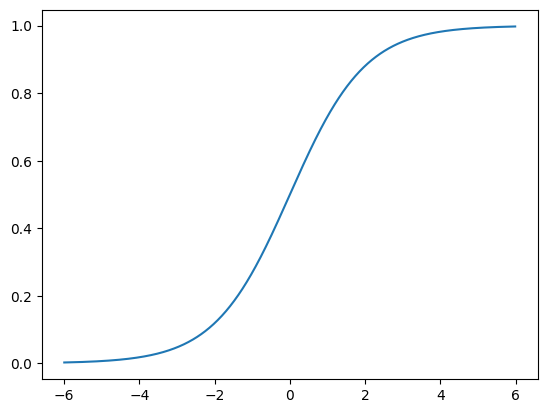

In [36]:
import matplotlib.pyplot as plt
from numpy import arange
x = arange(-6, 6, 0.01)
plt.plot(x, sig(x))
plt.show()

In [37]:
hidden1 = LayerModel(2)
hidden1.activation(sig)
output = LayerModel(1)
output.activation(sig)
nn = NeuNet(3)
nn.add_layer(hidden1)
nn.add_layer(output)
nn.layers

[Layer{w=[[0.62511289 0.4320753  0.16494703]
  [0.7340749  0.49421484 0.38846149]], b=[0. 0.]},
 Layer{w=[[0.56235146 0.4932366 ]], b=[0.]}]

array([0.67075604])